# Data Visualization using Python
This data visualization using Seaborn adopting from https://seaborn.pydata.org/tutorial/categorical.html. In addition to seaborn, matplotlib, bokeh, plotly, ggplot, altair, and geoplotlib libraries in 
Python provide excellent visualization tools. Geoplotlib is used for visualizing geographic data.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

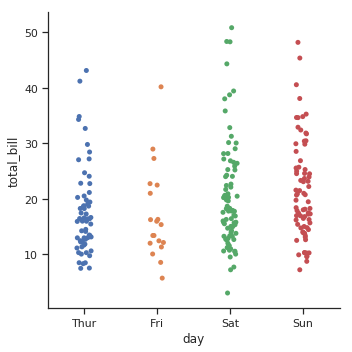

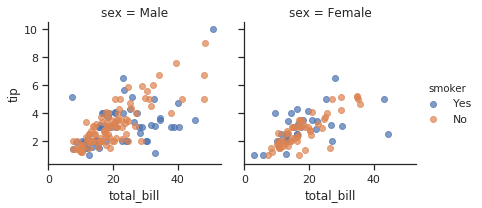

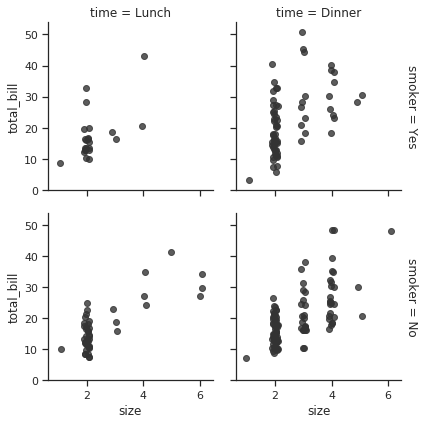

In [2]:
# Categorical scatterplots
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips);

g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".2", fit_reg=False, x_jitter=.1);

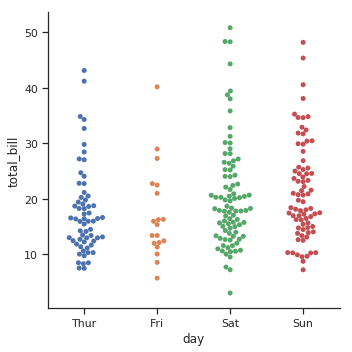

In [3]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

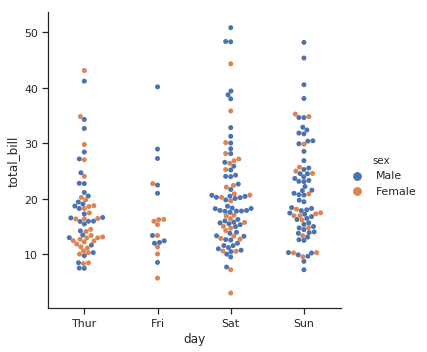

In [4]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips); 

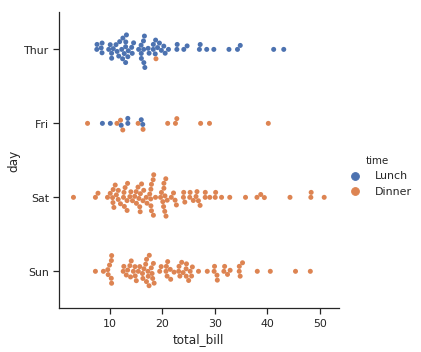

In [5]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

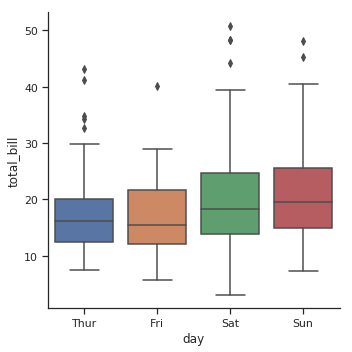

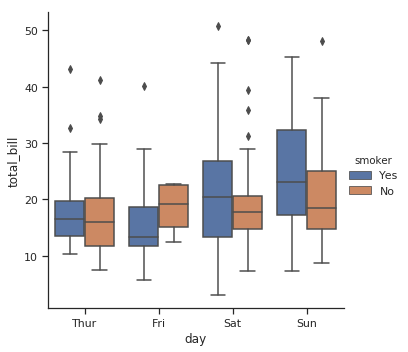

In [6]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

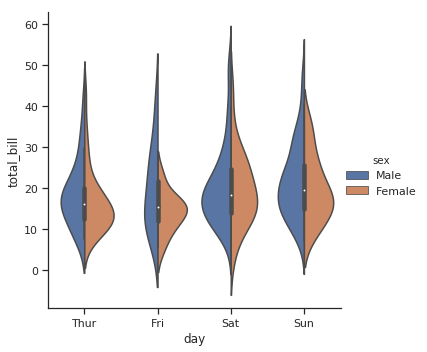

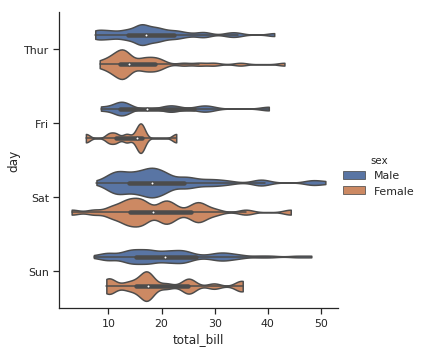

In [7]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", bw=.15, cut=0,
            data=tips);

/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


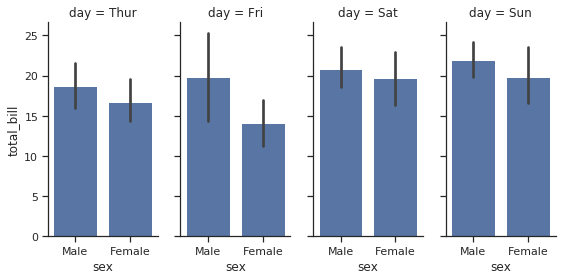

In [8]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill");

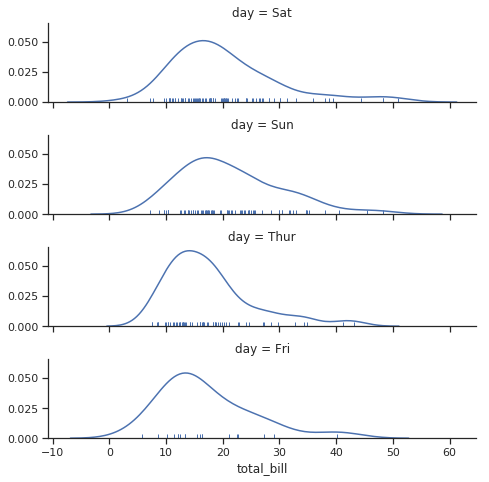

In [9]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True);

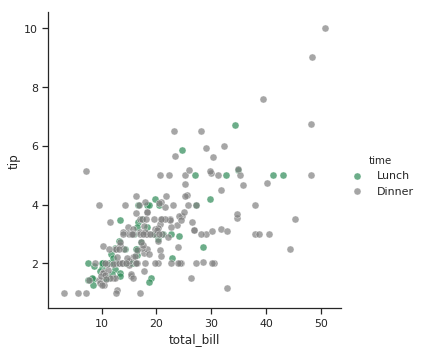

In [10]:
pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips, hue="time", palette=pal, height=5)
g.map(plt.scatter, "total_bill", "tip", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

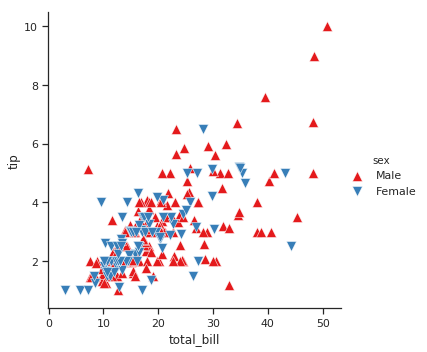

In [11]:
g = sns.FacetGrid(tips, hue="sex", palette="Set1", height=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor="white")
g.add_legend();

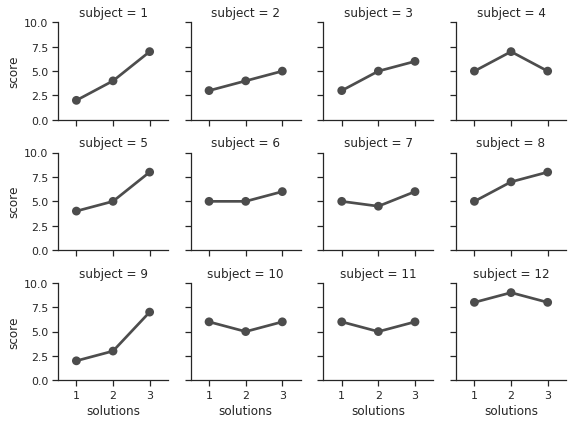

In [12]:
attend = sns.load_dataset("attention").query("subject <= 12")
g = sns.FacetGrid(attend, col="subject", col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", order=[1, 2, 3], color=".3", ci=None);

# Horizontal boxplot with observations

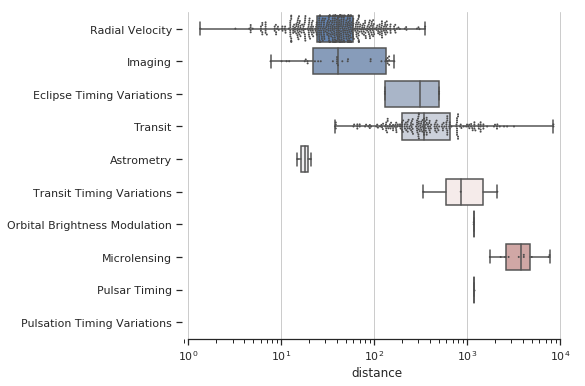

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="distance", y="method", data=planets,
              size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [14]:
# Source: https://hub.gke.mybinder.org/user/bokeh-bokeh-notebooks-xygnuogi/notebooks/tutorial/00%20-%20Introduction%20and%20Setup.ipynb

# Standard imports 

from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [15]:
# Plot a complex chart with intearctive hover in a few lines of code

from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
from bokeh.sampledata.autompg import autompg_clean as df
from bokeh.transform import factor_cmap

df.cyl = df.cyl.astype(str)
df.yr = df.yr.astype(str)

group = df.groupby(by=['cyl', 'mfr'])
source = ColumnDataSource(group)

p = figure(plot_width=800, plot_height=300, title="Mean MPG by # Cylinders and Manufacturer",
           x_range=group, toolbar_location=None, tools="")

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Manufacturer grouped by # Cylinders"
p.xaxis.major_label_orientation = 1.2

index_cmap = factor_cmap('cyl_mfr', palette=['#2b83ba', '#abdda4', '#ffffbf', '#fdae61', '#d7191c'], 
                         factors=sorted(df.cyl.unique()), end=1)

p.vbar(x='cyl_mfr', top='mpg_mean', width=1, source=source,
       line_color="white", fill_color=index_cmap, 
       hover_line_color="darkgrey", hover_fill_color=index_cmap)

p.add_tools(HoverTool(tooltips=[("MPG", "@mpg_mean"), ("Cyl, Mfr", "@cyl_mfr")]))

show(p)

In [16]:
from bokeh.plotting import figure, output_file, show
# data sets
x1 = [1, 2, 3, 4, 5]
y1 = [4, 6, 7, 2, 9]
x2 = [1, 2, 3, 4, 5]
y2 = [5, 8, 9, 6, 1]
# output is generated to static HTML file
output_file("lines.html")
# create a new plot with a title and axis labels
p = figure(title="Multiple Plots", x_axis_label='x',y_axis_label='y')
#plot the line graph on the figure and setting up color and width
p.line(x1, y1, legend="Line",color="red", line_width=2)
#plot the circle graph on the figure and setting up color and size
p.circle(x2,y2,legend="Circle",fill_color="yellow",size=15)
# show the results
show(p)

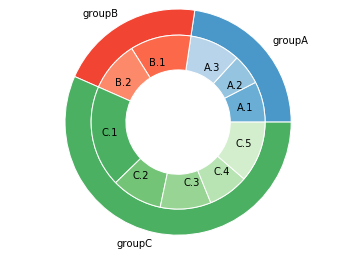

In [5]:
## https://python-graph-gallery.com/163-donut-plot-with-subgroups/

# Libraries
import matplotlib.pyplot as plt
 
# Make data: I have 3 groups and 7 subgroups
group_names=['groupA', 'groupB', 'groupC']
group_size=[12,11,30]
subgroup_names=['A.1', 'A.2', 'A.3', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 'C.4', 'C.5']
subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()


In [8]:
##More complex Sankey diagram with colored links

import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

ModuleNotFoundError: No module named 'plotly.graph_objects'

In [ ]:
# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)
fig.show()
 

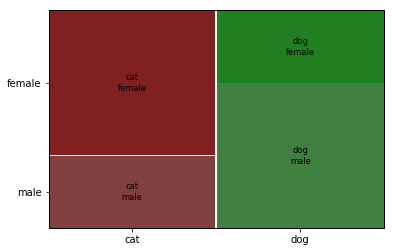

In [2]:
# Mosaic (marimmeko) plot example https://sukhbinder.wordpress.com/2018/09/18/mosaic-plot-in-python/

from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import pandas
 
gender = ['male', 'male', 'male', 'female', 'female', 'female']
pet = ['cat', 'dog', 'dog', 'cat', 'dog', 'cat']
data = pandas.DataFrame({'gender': gender, 'pet': pet})
mosaic(data, ['pet', 'gender'])
plt.show()